# DSP2: Final Classification with prepared dataset (75% of mark)

**Group:** BD-2006

**Student:** Anar,Aigerim,Sanzhar


## Outline:
1. Data and Task presentation - 10%
2. Data Preprocessing - 20%
3. Model (variety, complexity, tunning) - 20%
4. Imbalance(approaching this issue) - 20%
5. Code quality - 10%
6. Results and Defence - 20%

## Dataset Description:

### Task 1:
Мы постоянно работаем над улучшением качества своих продуктов и услуг для роста абонентской базы и минимизации оттока. В своей работе мы используем персональный подход к абонентам.
Для снижения оттока компания использует разные каналы коммуникации с клиентами. Каждое предложение должно быть адресовано определенной целевой группе. В этом задании вам предстоит по имеющимся данным попытаться определить абонентов, которые уйдут в отток.

**Что имеем**

Анонимизированные данные об абонентах: язык обслуживания абонента, тарифный план, информация об объёмах потребления различных услуг оператора и другие.
В файле data.csv содержится информация для построения модели.
Формат строк: 3 категориальных признака (C1, C2, C3), 23 числовых признака (N1, …, N23) и целевая переменная — TARGET.

**Что делать**

Описать этапы построения модели, построить модель, оценить ее и рассказать бизнесу как ее применять, то есть нужна бизнес-интерпретация. 

*Примечание: именно так изначально была построена задача, вы можете использовать ее в качестве руководства.*

### task1.csv columns description:
- **TARGET** - это значит что человек ушел в отток, я считаю что клиент ушедший в отток это плохо потому-что потеря клиента значит что больше не пользуется нашими услугами и соответственно не приносит прибыль.


In [1]:
# здесь импортится только эти или какие то глобальные по проекту штуки.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from IPython.display import Image
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None # показываем все колонки

import warnings
warnings.filterwarnings('ignore')

# Data and Task presentation

In [2]:
df = pd.read_csv('task1.csv', sep=';', decimal=",")
df

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,24.83,9.60,24.83,9.60,0.0,0.0,36,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,206.03,15.13,211.78,28.98,0.0,0.0,57,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,38.80,72.32,48.13,77.22,0.0,0.0,64,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,120.07,49.10,127.67,49.30,0.0,0.0,148,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,373.27,68.50,389.98,72.78,0.0,0.0,86,28,17,5,69,23,86,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514004,3532353737373832,313339,31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1
514005,3335363533383731,313339,31,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.00,0.12,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0
514006,3535343831313531,343637,31,0.00,0.00,0.00,0.00,1.27,0.00,1.27,0.00,0.00,0.00,1.27,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0
514007,3439393930353235,313339,31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1


In [3]:
def information_about_data_inner(dataframe):
    """функция создает series где ключ это колонка значение это [mode1,mode2....] из этой колонки
    помогает в нахождений Example of values"""
    result = {}
    for column in dataframe.columns:
        result[column] = dataframe[column].value_counts().sort_values(ascending=False).index.array[:10]
    return pd.Series(result)


def information_about_data(dataframe, example=False):
    "функция просто создает dataframe на основе данного с некоторой информацией"
    result = pd.DataFrame({'Column name':dataframe.isnull().sum().index, 
                           'Number of Nan':dataframe.isnull().sum().values,
                           'Procent of Nan':(dataframe.isnull().sum().values/len(dataframe)*100).round(1).astype(str),
                           'Number of unique':dataframe.nunique().values,
                           'Data type':dataframe.dtypes.values})
    if example:
        result['Example of values']=information_about_data_inner(dataframe).values
    print(f'Number of rows in dataframe - {len(dataframe)}')
    return result

In [4]:
information_about_data(df,example=True)# просто удобная функция чтобы быстро и широко посмотреть на данные

Number of rows in dataframe - 514009


,Column name,Number of Nan,Procent of Nan,Number of unique,Data type,Example of values
0,C1,0,0.0,514009,int64,"[3139363536333839, 35343636383133, 34313338313..."
1,C2,0,0.0,64,int64,"[343637, 343439, 343433, 343835, 343038, 31333..."
2,C3,0,0.0,3,int64,"[31, 33, 32]"
3,N1,0,0.0,41280,float64,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07..."
4,N2,0,0.0,174054,float64,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07..."
5,N3,0,0.0,237938,float64,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07..."
6,N4,0,0.0,42917,float64,"[0.0, 0.33, 0.17, 0.67, 0.03, 0.5, 0.07, 1.0, ..."
7,N5,0,0.0,27573,float64,"[0.0, 0.28, 0.27, 0.2, 0.35, 0.32, 0.4, 0.23, ..."
8,N6,0,0.0,8139,float64,"[0.0, 0.17, 0.33, 0.5, 0.67, 0.32, 0.38, 0.03,..."
9,N7,0,0.0,7537,float64,"[0.0, 0.28, 0.35, 0.3, 0.27, 0.32, 0.38, 0.33,..."


# Data Preprocessing

### Numerical

In [5]:
num_df = df.drop(['C1','C2','C3','TARGET'], axis=1)
num_df

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23
0,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,24.83,9.60,24.83,9.60,0.0,0.0,36,7,0,0,36,7,36,7,0,0
1,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,206.03,15.13,211.78,28.98,0.0,0.0,57,18,5,6,52,12,57,18,0,0
2,0.00,31.95,763.19,48.13,77.22,9.33,4.90,38.80,72.32,48.13,77.22,0.0,0.0,64,24,18,6,46,18,64,24,0,0
3,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,120.07,49.10,127.67,49.30,0.0,0.0,148,57,4,1,142,56,148,57,0,0
4,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,373.27,68.50,389.98,72.78,0.0,0.0,86,28,17,5,69,23,86,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0
514005,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.00,0.12,0.0,0.0,0,1,0,1,0,0,0,1,0,0
514006,0.00,0.00,0.00,0.00,1.27,0.00,1.27,0.00,0.00,0.00,1.27,0.0,0.0,0,1,0,1,0,0,0,1,0,0
514007,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0


In [6]:
num_df.describe()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23
count,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.00000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000
mean,44.571923,934.872724,2875.756859,108.307058,62.711117,12.868516,9.464795,94.316118,53.081758,108.232785,62.678793,0.074272,0.032309,49.656251,29.079176,10.447070,7.747530,38.66520,21.243424,49.609273,29.059777,0.046978,0.019398
std,232.708320,2272.072942,4932.847144,197.771895,99.919667,19.511682,16.725490,191.665455,96.310396,197.762070,99.892626,1.518830,2.218416,58.781180,31.241034,14.888752,11.964678,50.26614,24.155985,58.757945,31.233367,0.708441,0.349181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.800000,9.580000,0.000000,0.220000,0.420000,5.370000,2.750000,9.570000,0.000000,0.000000,4.000000,8.000000,0.000000,1.000000,2.00000,4.000000,4.000000,8.000000,0.000000,0.000000
50%,0.000000,77.460000,109.600000,45.000000,33.020000,4.970000,3.300000,29.100000,23.530000,44.920000,33.000000,0.000000,0.000000,32.000000,20.000000,5.000000,4.000000,21.00000,14.000000,32.000000,20.000000,0.000000,0.000000
75%,0.560000,785.780000,4247.730000,132.020000,77.500000,18.350000,11.570000,108.530000,62.330000,131.930000,77.470000,0.000000,0.000000,73.000000,40.000000,15.000000,10.000000,56.00000,30.000000,73.000000,40.000000,0.000000,0.000000
max,27971.110000,96905.370000,201234.910000,9197.630000,5192.670000,441.880000,999.780000,9194.270000,5192.670000,9197.630000,5192.670000,255.950000,713.400000,1346.000000,1258.000000,430.000000,499.000000,1109.00000,1024.000000,1346.000000,1258.000000,118.000000,99.000000


### Corelation

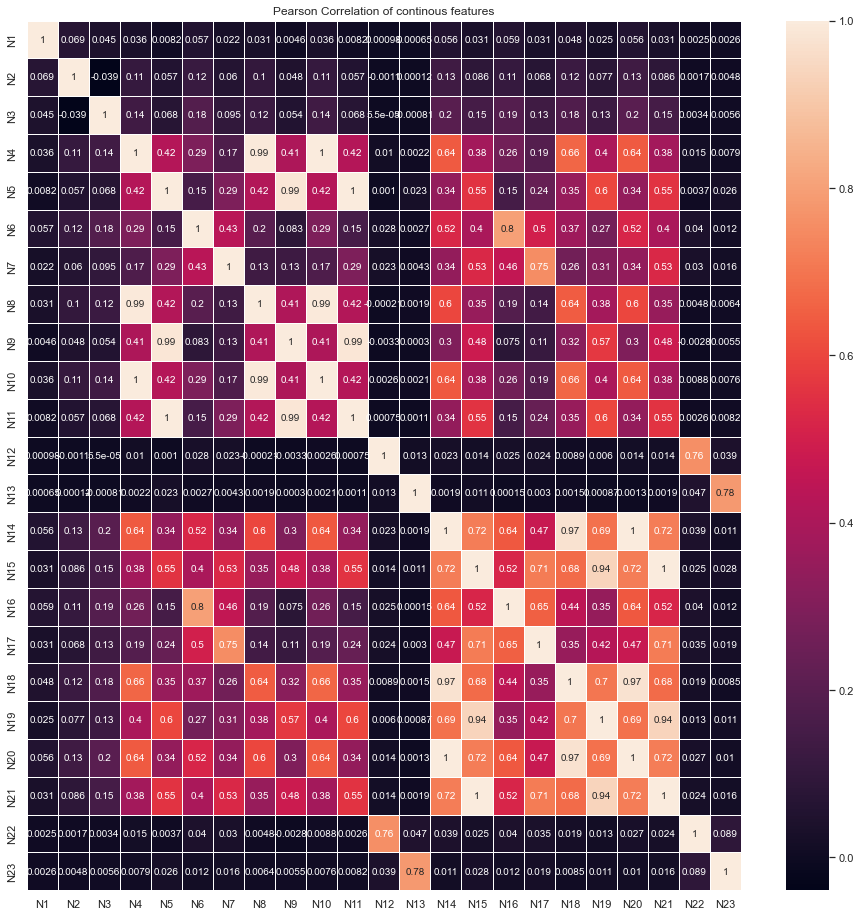

In [7]:
# Relationship analysis based on correlation matrix
plt.subplots(figsize=(16, 16))
plt.title('Pearson Correlation of continous features')
sns.heatmap(num_df.corr(),annot = True,linewidths=.5,)
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler, RobustScaler

In [9]:
num_df=pd.DataFrame(StandardScaler().fit_transform(num_df),columns=num_df.columns)
num_df

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23
0,0.168314,0.985025,-0.546192,-0.422088,-0.531539,-0.659529,-0.565891,-0.362539,-0.451476,-0.421733,-0.531359,-0.048901,-0.014564,-0.232324,-0.706737,-0.701676,-0.647534,-0.053022,-0.589644,-0.231616,-0.706289,-0.066312,-0.055554
1,-0.185262,0.149206,-0.564309,0.523194,-0.337583,-0.364834,0.262187,0.582859,-0.394057,0.523595,-0.337350,-0.048901,-0.014564,0.124934,-0.354636,-0.365852,-0.146058,0.265284,-0.382656,0.125783,-0.354102,-0.066312,-0.055554
2,-0.191536,-0.397401,-0.428266,-0.304275,0.145206,-0.181354,-0.272925,-0.289651,0.199753,-0.303915,0.145569,-0.048901,-0.014564,0.244020,-0.162580,0.507292,-0.146058,0.145919,-0.134270,0.244916,-0.161999,-0.066312,-0.055554
3,0.313346,-0.178552,-0.277600,0.097906,-0.134219,-0.339208,-0.553933,0.134369,-0.041343,0.098286,-0.133932,-0.048901,-0.014564,1.673050,0.893724,-0.433017,-0.563955,2.055756,1.438840,1.674511,0.894564,-0.066312,-0.055554
4,-0.191536,-0.394632,0.125166,1.424233,0.100770,0.197394,-0.309994,1.455422,0.160089,1.424679,0.101121,-0.048901,-0.014564,0.618289,-0.034544,0.440127,-0.229637,0.603484,0.072718,0.619333,-0.033931,-0.066312,-0.055554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514004,-0.191536,-0.411463,-0.582982,-0.547637,-0.627616,-0.659529,-0.565891,-0.492088,-0.551153,-0.547288,-0.627462,-0.048901,-0.014564,-0.844765,-0.930802,-0.701676,-0.647534,-0.769210,-0.879428,-0.844300,-0.930409,-0.066312,-0.055554
514005,-0.191536,-0.411463,-0.582982,-0.547637,-0.626415,-0.659529,-0.558716,-0.492088,-0.551153,-0.547288,-0.626261,-0.048901,-0.014564,-0.844765,-0.898792,-0.701676,-0.563955,-0.769210,-0.879428,-0.844300,-0.898392,-0.066312,-0.055554
514006,-0.191536,-0.411463,-0.582982,-0.547637,-0.614906,-0.659529,-0.489959,-0.492088,-0.551153,-0.547288,-0.614749,-0.048901,-0.014564,-0.844765,-0.898792,-0.701676,-0.563955,-0.769210,-0.879428,-0.844300,-0.898392,-0.066312,-0.055554
514007,-0.191536,-0.411463,-0.582982,-0.547637,-0.627616,-0.659529,-0.565891,-0.492088,-0.551153,-0.547288,-0.627462,-0.048901,-0.014564,-0.844765,-0.930802,-0.701676,-0.647534,-0.769210,-0.879428,-0.844300,-0.930409,-0.066312,-0.055554


# Categorical

In [10]:
# import для encoding и всякого такого здесь
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [11]:
cat_df = df.filter(regex='C')
cat_df
# выбераем только категориальные данные.

,C1,C2,C3
0,3139363536333839,323531,33
1,3437333830323633,343835,31
2,3134323931353339,323531,33
3,3431333831343031,343433,31
4,3233343933313234,343835,31
...,...,...,...
514004,3532353737373832,313339,31
514005,3335363533383731,313339,31
514006,3535343831313531,343637,31
514007,3439393930353235,313339,31


In [12]:
information_about_data(cat_df, example=True)

Number of rows in dataframe - 514009


,Column name,Number of Nan,Procent of Nan,Number of unique,Data type,Example of values
0,C1,0,0.0,514009,int64,"[3139363536333839, 35343636383133, 34313338313..."
1,C2,0,0.0,64,int64,"[343637, 343439, 343433, 343835, 343038, 31333..."
2,C3,0,0.0,3,int64,"[31, 33, 32]"


Как видно эти данные хоть и считаются categorical они имееют data type int64. И это есть причина почему мы не можем сразу закинуть наши features в кодировку.

max - 3536383030363434
min - 353033


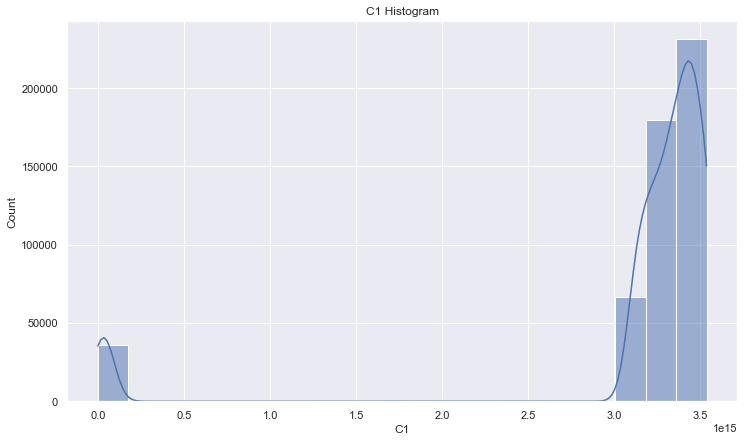

In [13]:
fig,axes = plt.subplots(figsize=(12,7))
sns.histplot(ax=axes,x="C1", bins=20, kde=True,data=cat_df)
axes.set(title='C1 Histogram', xlabel='C1', ylabel='Count')
print(f"max - {max(cat_df['C1'])}")
print(f"min - {min(cat_df['C1'])}")
plt.show()

max - 353036
min - 3138


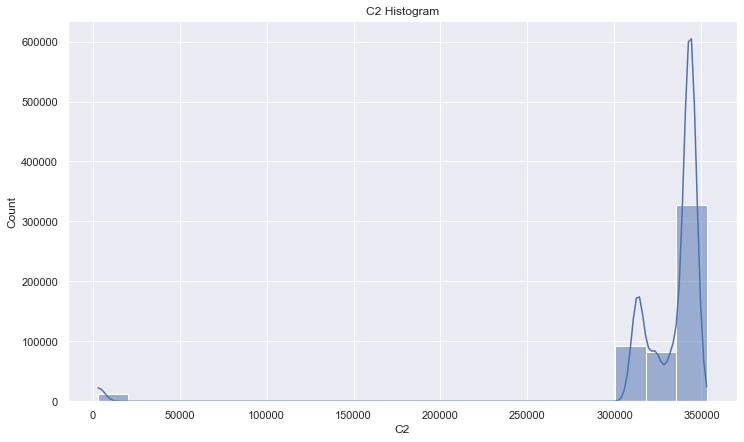

In [14]:
fig,axes = plt.subplots(figsize=(12,7))
sns.histplot(ax=axes,x="C2", bins=20, kde=True,data=cat_df)
axes.set(title='C2 Histogram', xlabel='C2', ylabel='Count')
print(f"max - {max(cat_df['C2'])}")
print(f"min - {min(cat_df['C2'])}")
plt.show()

max - 33
min - 31


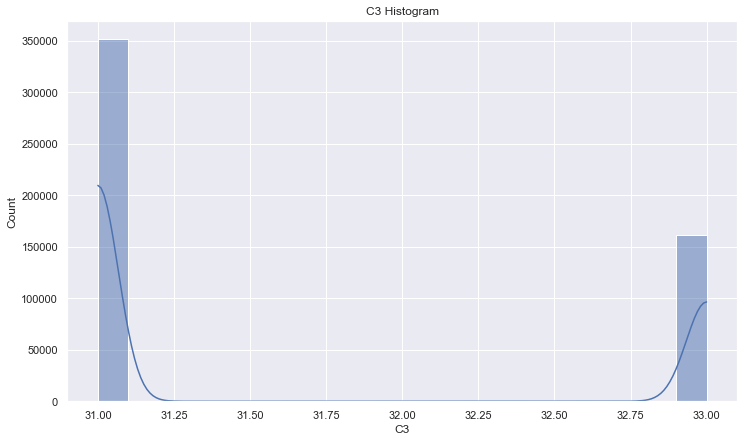

In [17]:
fig,axes = plt.subplots(figsize=(12,7))
sns.histplot(ax=axes,x="C3", bins=20, kde=True,data=cat_df)
axes.set(title='C3 Histogram', xlabel='C3', ylabel='Count')
print(f"max - {max(cat_df['C3'])}")
print(f"min - {min(cat_df['C3'])}")
plt.show()

Я в ручную разделю каждую cat на три группы Good,Norm,Bad потому что у нас нету описания чем является каждая категорикал и данный вариант в целом универальный(кроме бинари но у нас тут таких нету).

In [18]:
cat_df.describe(percentiles=[0.33,0.66])

,C1,C2,C3
count,5.140090e+05,514009.000000,514009.000000
mean,3.125269e+15,327890.745425,31.630411
std,8.589417e+14,51107.511245,0.929149
min,3.530330e+05,3138.000000,31.000000
33%,3.234364e+15,333538.000000,31.000000
50%,3.337374e+15,343230.000000,31.000000
66%,3.434373e+15,343439.000000,31.000000
max,3.536383e+15,353036.000000,33.000000


In [19]:
# В ручную конвертирую эти какбы категорикал-нумерикал в категорикал
# ================================================
bins = [0, 3.234364*10**15, 3.434373*10**15, np.inf]
names = ['Bad', 'Norm', 'Good']
cat_df['C1'] = pd.cut(df['C1'], bins, labels=names)

bins = [0, 333538, 343439, np.inf]
names = ['Bad', 'Norm', 'Good']
cat_df['C2'] = pd.cut(df['C2'], bins, labels=names)

bins = [0, 31, 32, np.inf]
names = ['Bad', 'Norm', 'Good']
cat_df['C3'] = pd.cut(df['C3'], bins, labels=names)

cat_df

,C1,C2,C3
0,Bad,Bad,Good
1,Good,Good,Bad
2,Bad,Bad,Good
3,Norm,Norm,Bad
4,Bad,Good,Bad
...,...,...,...
514004,Good,Bad,Bad
514005,Norm,Bad,Bad
514006,Good,Good,Bad
514007,Good,Bad,Bad


In [20]:
def One_hot_encoding(data, column_name):
    """Этот метод кодировки берет категориальную колонку например GenHealth с значениями /Very good/Good/Excellent/Fair/Poor
    и создает еще сколько же колонок и если в GenHealth стоял Very good то колонка Very good будет-1 остальные 0
    Чтобы понять просто вбейте эту команду
    """
    ohe_style = OneHotEncoder()
    ohe_results = ohe_style.fit_transform(data[[column_name]])
    ecn_df = pd.DataFrame(ohe_results.toarray(), columns = ohe_style.categories_)
    result = data.join(pd.DataFrame(ohe_results.toarray(), columns=[column_name+'_'+i for i in ohe_style.categories_[0]]),  
                       how = 'left', lsuffix = '_left', rsuffix = '_right').drop(column_name,axis=1)
    return result

def Ordinal_encoder(dataframe, column_name):
    """Этот метод кодировки просто кадому значению внутри колонки придает число например GenHealth  Very good-1,Good-2,
    Excellent-3 и тд.
    """
    result = dataframe.copy()
    ord_enc = OrdinalEncoder()
    result[column_name] = ord_enc.fit_transform(dataframe[[column_name]])
    return result

In [21]:
cat_df.columns

Index(['C1', 'C2', 'C3'], dtype='object')

In [22]:
# Кодировка
# =========================================================
One_hot_encoding_cols = ['C1','C2','C3'] 
Ordinal_encoder_cols = []
for column in cat_df.columns:
    if column in Ordinal_encoder_cols:
        cat_df = Ordinal_encoder(cat_df,column)
    elif column in One_hot_encoding_cols:
        cat_df = One_hot_encoding(cat_df,column)
    else:
        cat_df = cat_df.drop([column], axis=1)

cat_df

,C1_Bad,C1_Good,C1_Norm,C2_Bad,C2_Good,C2_Norm,C3_Bad,C3_Good,C3_Norm
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
514004,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
514005,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
514006,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
514007,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# УРАААА!! Воссоединяем наши датасеты. Они были созданы друг для друга таких как они называют родственные души
# ===============================================================
df = df['TARGET'].to_frame(name="Target").join(cat_df).join(num_df)
del cat_df # она была с Венеры а он с Юго-востока
del num_df
df

,Target,C1_Bad,C1_Good,C1_Norm,C2_Bad,C2_Good,C2_Norm,C3_Bad,C3_Good,C3_Norm,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23
0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.168314,0.985025,-0.546192,-0.422088,-0.531539,-0.659529,-0.565891,-0.362539,-0.451476,-0.421733,-0.531359,-0.048901,-0.014564,-0.232324,-0.706737,-0.701676,-0.647534,-0.053022,-0.589644,-0.231616,-0.706289,-0.066312,-0.055554
1,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.185262,0.149206,-0.564309,0.523194,-0.337583,-0.364834,0.262187,0.582859,-0.394057,0.523595,-0.337350,-0.048901,-0.014564,0.124934,-0.354636,-0.365852,-0.146058,0.265284,-0.382656,0.125783,-0.354102,-0.066312,-0.055554
2,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.191536,-0.397401,-0.428266,-0.304275,0.145206,-0.181354,-0.272925,-0.289651,0.199753,-0.303915,0.145569,-0.048901,-0.014564,0.244020,-0.162580,0.507292,-0.146058,0.145919,-0.134270,0.244916,-0.161999,-0.066312,-0.055554
3,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.313346,-0.178552,-0.277600,0.097906,-0.134219,-0.339208,-0.553933,0.134369,-0.041343,0.098286,-0.133932,-0.048901,-0.014564,1.673050,0.893724,-0.433017,-0.563955,2.055756,1.438840,1.674511,0.894564,-0.066312,-0.055554
4,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.191536,-0.394632,0.125166,1.424233,0.100770,0.197394,-0.309994,1.455422,0.160089,1.424679,0.101121,-0.048901,-0.014564,0.618289,-0.034544,0.440127,-0.229637,0.603484,0.072718,0.619333,-0.033931,-0.066312,-0.055554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514004,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.191536,-0.411463,-0.582982,-0.547637,-0.627616,-0.659529,-0.565891,-0.492088,-0.551153,-0.547288,-0.627462,-0.048901,-0.014564,-0.844765,-0.930802,-0.701676,-0.647534,-0.769210,-0.879428,-0.844300,-0.930409,-0.066312,-0.055554
514005,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.191536,-0.411463,-0.582982,-0.547637,-0.626415,-0.659529,-0.558716,-0.492088,-0.551153,-0.547288,-0.626261,-0.048901,-0.014564,-0.844765,-0.898792,-0.701676,-0.563955,-0.769210,-0.879428,-0.844300,-0.898392,-0.066312,-0.055554
514006,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.191536,-0.411463,-0.582982,-0.547637,-0.614906,-0.659529,-0.489959,-0.492088,-0.551153,-0.547288,-0.614749,-0.048901,-0.014564,-0.844765,-0.898792,-0.701676,-0.563955,-0.769210,-0.879428,-0.844300,-0.898392,-0.066312,-0.055554
514007,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.191536,-0.411463,-0.582982,-0.547637,-0.627616,-0.659529,-0.565891,-0.492088,-0.551153,-0.547288,-0.627462,-0.048901,-0.014564,-0.844765,-0.930802,-0.701676,-0.647534,-0.769210,-0.879428,-0.844300,-0.930409,-0.066312,-0.055554


# Imbalance(approaching this issue)

Imbalance в данных
Number without Target: 488665
Number with Target: 25344
Proportion: 19.28 : 1
Percent: 95.1% : 4.9%


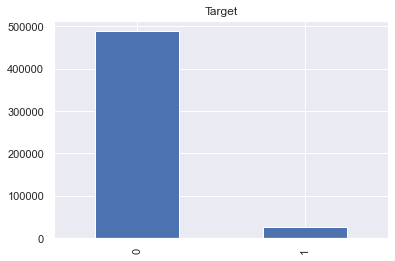

In [24]:
x = df.drop('Target', axis=1)
y = df['Target']

print("\033[1m"+"Imbalance в данных"+"\033[0m")
target_count = x.join(y)[y.name].value_counts()
print(f'Number without {y.name}:', target_count[0])
print(f'Number with {y.name}:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
print(f'Percent: {round(target_count[0] / (target_count[1]+target_count[0]), 3)*100}%',
      ':' ,f'{round(target_count[1] / (target_count[1]+target_count[0]), 3)*100}%')

target_count.plot(kind='bar', title=y.name);

Дальше я разделю данные на тренировачную и тестовую выборку и сохраню imbalance в тестовых данных чтобы проверять качество моделей на максимлаьно правдоподобных даннах.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)
del x
del y

Train до resampling
Number without Target: 390909
Number with Target: 20298
Proportion: 19.26 : 1
Percent: 95.1% : 4.9%


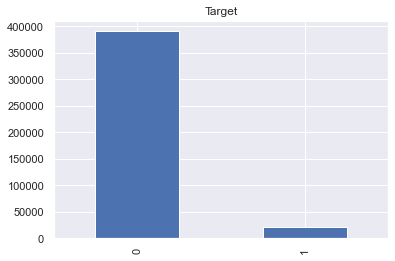

In [26]:
print("\033[1m"+"Train до resampling"+"\033[0m")
# ===============================================================
target_count = x_train.join(y_train)[y_train.name].value_counts()
print(f'Number without {y_train.name}:', target_count[0])
print(f'Number with {y_train.name}:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
print(f'Percent: {round(target_count[0] / (target_count[1]+target_count[0]), 3)*100}%',
      ':' ,f'{round(target_count[1] / (target_count[1]+target_count[0]), 3)*100}%')

target_count.plot(kind='bar', title=y_train.name);

In [27]:
# pip install imbalanced-learn это надо вбить в терминал
# ===============================================================
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [28]:
# Тут делаем наш resampling
# ===============================================================
resampling = RandomUnderSampler(random_state=666)
x_train, y_train = resampling.fit_resample(x_train, y_train)

Train после resampling
Number without Target: 20298
Number with Target: 20298
Proportion: 1.0 : 1
Percent: 50.0% : 50.0%


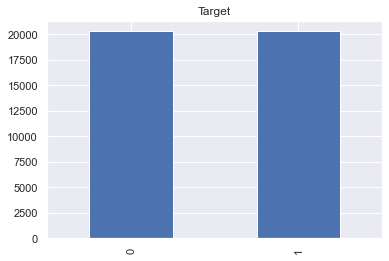

In [29]:
print("\033[1m"+"Train после resampling"+"\033[0m")
# ===============================================================
target_count = x_train.join(y_train)[y_train.name].value_counts()
print(f'Number without {y_train.name}:', target_count[0])
print(f'Number with {y_train.name}:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
print(f'Percent: {round(target_count[0] / (target_count[1]+target_count[0]), 3)*100}%',
      ':' ,f'{round(target_count[1] / (target_count[1]+target_count[0]), 3)*100}%')

target_count.plot(kind='bar', title=y_train.name)
plt.show()

Test до и после resampling (он здесь не меняется)
Number without Target: 97756
Number with Target: 5046
Proportion: 19.37 : 1
Percent: 95.1% : 4.9%


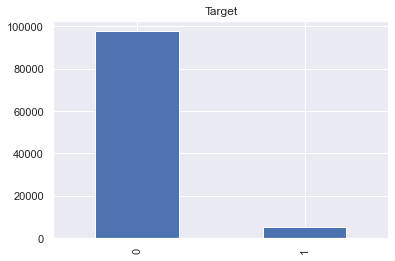

In [30]:
print("\033[1m"+"Test до и после resampling (он здесь не меняется)"+"\033[0m")
# ===============================================================
target_count = x_test.join(y_test)[y_test.name].value_counts()
print(f'Number without {y_test.name}:', target_count[0])
print(f'Number with {y_test.name}:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
print(f'Percent: {round(target_count[0] / (target_count[1]+target_count[0]), 3)*100}%',
      ':' ,f'{round(target_count[1] / (target_count[1]+target_count[0]), 3)*100}%')

target_count.plot(kind='bar', title=y_test.name)


del resampling
del target_count

# Model (variety, complexity, tunning)

У нас 100% стоит проблема переобучения потому-что результаты на тренеровочной выборке слишком сильно превосходят на тестовой выборке это говорит нам о переобучений

Решения для переобучения: https://www.kaggle.com/getting-started/157623

Используем разделение на train test.

Можем прям щас использовать подбор параметров(кодировка), Cross-validation(много вычислений), Hyper tunning, увелечение данных(SMOTE).

Стоит попробывать l1,l2 регуляризация

**Метриками для оценки результатов наших моделей будут**

**Accuracy** - Сколько (доля) истинных меток я правильно предсказал?

**Precision** - как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными. TP/TP + FP

**Recall** - какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.TP/TP + FN

**F1-Score** - как среднее гармоническое между показателями precision и recall.

**Confusion matrix** - Матрица


https://www.kaggle.com/code?searchQuery=Predict+outflow

In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from inspect import signature

In [32]:
# functions
def print_scores(model,y_test,model_y_predict):
    """
    Функция которую я использую для вывода оценок той или иной модели, тут всякие Accuracy и подобное просто каждый раз
    писать один и тот же код не удобно
    """
    if not isinstance(model, str):
        from re import  split
        model = split(r'\(', str(model))[0]
        
    print(f'Model: '+ "\033[1m"+model+"\033[0m")
    print(f'Accuracy_score: {accuracy_score(y_test,model_y_predict)}')
    print(f'Precission_score: {precision_score(y_test,model_y_predict)}')
    print(f'Recall_score: {recall_score(y_test,model_y_predict)}')
    print(f'F1-score: {f1_score(y_test,model_y_predict)}')
    
    cm  = confusion_matrix(y_test, model_y_predict)
    ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels([f'No {y_test.name}',y_test.name])
    ax.yaxis.set_ticklabels([f'No {y_test.name}',y_test.name])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

### LogisticRegression

Model: LogisticRegression on test
Accuracy_score: 0.7170288515787631
Precission_score: 0.12770964944877988
Recall_score: 0.8172810146650813
F1-score: 0.22090095880872032


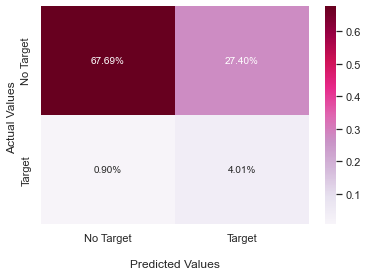

Model: LogisticRegression on train
Accuracy_score: 0.7653956054783723
Precission_score: 0.7391246448863636
Recall_score: 0.8203271258252045
F1-score: 0.7776117311913324


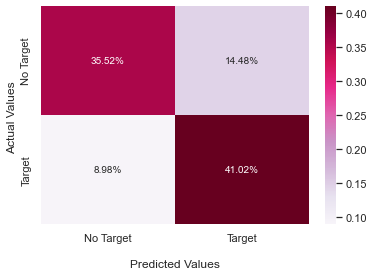

In [35]:
lr = LogisticRegression(random_state=666)

lr.fit(x_train.drop(['N21','N20','N10','N11','N9','N8'],axis=1), y_train)

print_scores('LogisticRegression on test',y_test,lr.predict(x_test.drop(['N21','N20','N10','N11','N9','N8'],axis=1)))
print_scores('LogisticRegression on train',y_train,lr.predict(x_train.drop(['N21','N20','N10','N11','N9','N8'],axis=1)))

### KNeighborsClassifier

Model: KNeighborsClassifier on test
Accuracy_score: 0.7739246318165016
Precission_score: 0.14837861863718935
Recall_score: 0.7608006341656758
F1-score: 0.24832627187166464


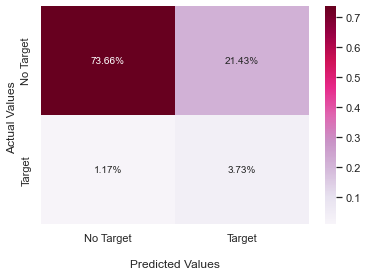

Model: KNeighborsClassifier on train
Accuracy_score: 0.8323233816139521
Precission_score: 0.8378662659654396
Recall_score: 0.8241206030150754
F1-score: 0.8309365919082036


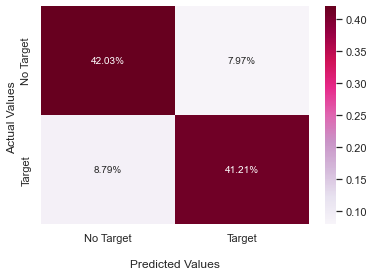

In [36]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(x_train, y_train)

print_scores('KNeighborsClassifier on test',y_test,knn.predict(x_test))
print_scores('KNeighborsClassifier on train',y_train,knn.predict(x_train))

### Support Vector Machine(SVM)

Model: KNeighborsClassifier on test
Accuracy_score: 0.782776599677049
Precission_score: 0.15765498118439294
Recall_score: 0.7887435592548553
F1-score: 0.2627843253771748


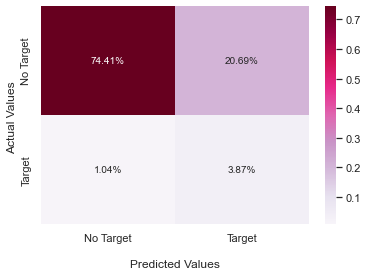

Model: KNeighborsClassifier on train
Accuracy_score: 0.7932308601832693
Precission_score: 0.7878143133462282
Recall_score: 0.8026406542516504
F1-score: 0.7951583776660648


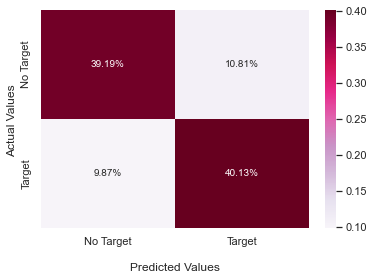

In [37]:
svm = SVC()
svm.fit(x_train, y_train)

print_scores('KNeighborsClassifier on test',y_test,svm.predict(x_test))
print_scores('KNeighborsClassifier on train',y_train,svm.predict(x_train))

### RandomForestClassifier

Model: RandomForestClassifier on test
Accuracy_score: 0.8163654403610825
Precission_score: 0.17570102222639034
Recall_score: 0.7425683709869203
F1-score: 0.2841650235097831


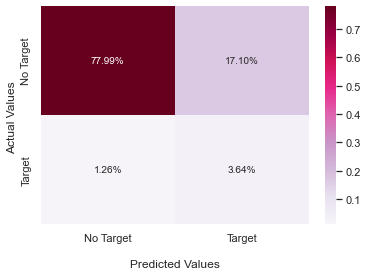

Model: RandomForestClassifier on train
Accuracy_score: 0.9878805793674253
Precission_score: 0.9770231213872832
Recall_score: 0.9992610109370381
F1-score: 0.9880169516294022


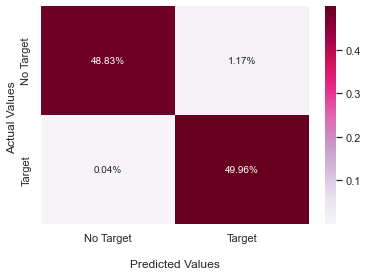

In [39]:
rf = RandomForestClassifier(random_state=666)
rf.fit(x_train, y_train)

print_scores('RandomForestClassifier on test',y_test,rf.predict(x_test))
print_scores('RandomForestClassifier on train',y_train,rf.predict(x_train))

In [40]:
pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

N20        7.459881e-02
N8         7.249880e-02
N9         6.397846e-02
N11        6.330882e-02
N18        6.247630e-02
N10        6.169978e-02
N14        6.026350e-02
N5         5.728013e-02
N21        5.575452e-02
N15        4.998272e-02
N19        4.962405e-02
N2         4.622827e-02
N4         4.471462e-02
N7         3.626909e-02
N3         3.518595e-02
N6         2.291217e-02
N1         2.257130e-02
N17        2.217644e-02
N16        1.924921e-02
C1_Good    1.621728e-02
C1_Bad     1.416010e-02
C2_Bad     7.596403e-03
C2_Norm    7.480162e-03
C2_Good    7.472771e-03
C1_Norm    5.988690e-03
C3_Good    5.583972e-03
C3_Bad     5.373018e-03
N12        3.441142e-03
N22        2.651980e-03
N13        1.868420e-03
N23        1.393114e-03
C3_Norm    1.423217e-08
dtype: float64

# Model Comparison

In [41]:
from sklearn.metrics import RocCurveDisplay

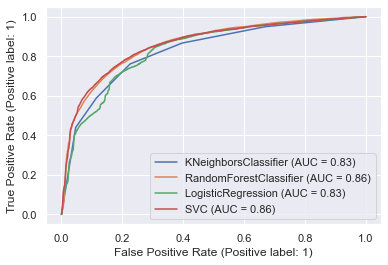

In [45]:
ax = plt.gca()
RocCurveDisplay.from_estimator(knn, x_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(lr, x_test.drop(['N21','N20','N10','N11','N9','N8'],axis=1), y_test, ax=ax)
RocCurveDisplay.from_estimator(svm, x_test, y_test, ax=ax)
plt.show()

In the end, what we wanted to achieve was shown, as you can see in all akurasi more than 80 percent and we also used double datasets, the train set was the main one, we did everything we wanted on it, the dataset test remained intact.

The knn algorithm was used to search for similarity of documents and pattern recognition, this algorithm will be needed for every business if they want to see and read the document in more detail.
this logistic regression solves the classification problem.
Random Forest is a flexible algorithm and is used to solve almost any problems in the field of machine learning. This includes classifications and regressions, as well as more complex tasks, such as feature selection, outlier/anomaly search, and clustering.